Testing traditional ML method - XGBoost


## Build Model


23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 357ms/step


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:55:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)




Acc: 0.910958904109589
AUC: 0.9444575471698113
{'cancer': 0, 'normal': 1}


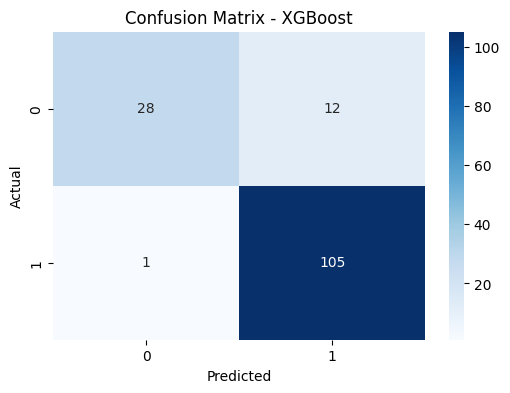

Classification Report:
              precision    recall  f1-score   support

      cancer     0.9655    0.7000    0.8116        40
      normal     0.8974    0.9906    0.9417       106

    accuracy                         0.9110       146
   macro avg     0.9315    0.8453    0.8766       146
weighted avg     0.9161    0.9110    0.9061       146



In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

ROOT = "Oral Cancer Prediction"
DATA_PATH = os.path.join(ROOT, "assets", "dataset")
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

classes = {"cancer": 0, "normal": 1}
CLASS_NAMES = ["cancer", "normal"]


# Load images and labels
def load_images_and_labels(base_path, img_size=IMG_SIZE):
    images, labels = [], []
    for label_name in CLASS_NAMES:
        class_dir = os.path.join(base_path, label_name)
        label = classes[label_name]
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)


# Step 1: Load images
X_images, y = load_images_and_labels(DATA_PATH)

# Step 2: Extract features using EfficientNetB0
base_model = EfficientNetB0(include_top=False, weights="imagenet", pooling="avg")
X_images = preprocess_input(X_images.astype("float32"))
features = base_model.predict(X_images, batch_size=BATCH_SIZE)

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    features, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: Train XGBoost classifier
model_xgboost_1 = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.05,
    use_label_encoder=False,
    eval_metric="logloss",
)
model_xgboost_1.fit(X_train, y_train)

# Step 5: Evaluation
y_pred = model_xgboost_1.predict(X_test)
print("\n\nAcc:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, model_xgboost_1.predict_proba(X_test)[:, 1]))

print(classes)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=CLASS_NAMES, digits=4))

# Save model
models_path = os.path.join(ROOT, "models")
model_version = 1 + sum(md.startswith("XGboost") for md in os.listdir(models_path))
model_path = os.path.join(models_path, f"XGboost_model_v{model_version}.json")
model_xgboost_1.save_model(model_path)
print(f"Saved: XGboost_model_v{model_version}.json")

76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)




Acc: 0.9565217391304348
AUC: 0.901410835214447
{'cancer': 0, 'normal': 1}


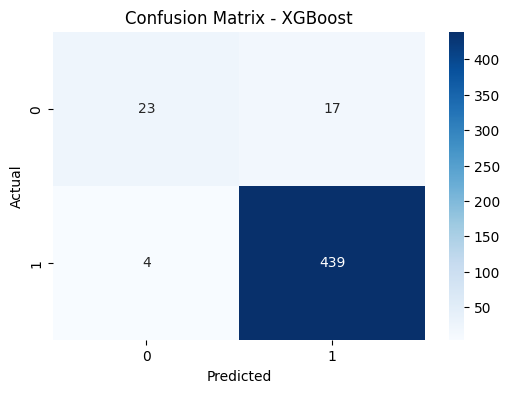

Classification Report:
              precision    recall  f1-score   support

      cancer     0.8519    0.5750    0.6866        40
      normal     0.9627    0.9910    0.9766       443

    accuracy                         0.9565       483
   macro avg     0.9073    0.7830    0.8316       483
weighted avg     0.9535    0.9565    0.9526       483



In [ ]:
import os
import cv2
import numpy as np
import xgboost as xgb
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

ROOT = "Oral Cancer Prediction"
DATA_PATH = os.path.join(ROOT, "assets", "dataset_2")
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

classes = {"cancer": 0, "normal": 1}
CLASS_NAMES = ["cancer", "normal"]


# Load images and labels
def load_images_and_labels(base_path, img_size=IMG_SIZE):
    images, labels = [], []
    for label_name in classes.keys():
        class_dir = os.path.join(base_path, label_name)
        label = classes[label_name]  # 0 if label_name == 'normal' else 1
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)


# Step 1: Load images
X_images, y = load_images_and_labels(DATA_PATH)

# Step 2: Extract features using EfficientNetB0
base_model = EfficientNetB0(include_top=False, weights="imagenet", pooling="avg")
X_images = preprocess_input(X_images.astype("float32"))
features = base_model.predict(X_images, batch_size=BATCH_SIZE)

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    features, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: Train XGBoost classifier
model_xgboost_2 = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.05,
    use_label_encoder=False,
    eval_metric="logloss",
)
model_xgboost_2.fit(X_train, y_train)

# Step 5: Evaluation
y_pred = model_xgboost_2.predict(X_test)
print("\n\nAcc:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, model_xgboost_2.predict_proba(X_test)[:, 1]))

print(classes)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=CLASS_NAMES, digits=4))

# Save model
models_path = os.path.join(ROOT, "models")
model_version = 1 + sum(md.startswith("XGboost") for md in os.listdir(models_path))
model_path = os.path.join(models_path, f"XGboost_model_v{model_version}.json")
model_xgboost_2.save_model(model_path)
print(f"Saved: XGboost_model_v{model_version}.json")

## Check results


23/23 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step
XGboost model version: 1


Acc: 0.8767123287671232
AUC: 0.9216981132075472
{'cancer': 1, 'normal': 0}


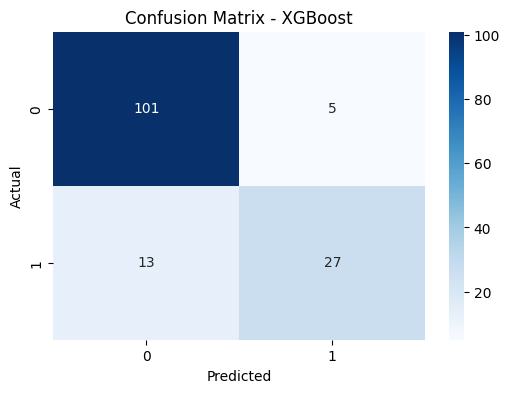

Classification Report:
              precision    recall  f1-score   support

           0     0.8860    0.9528    0.9182       106
           1     0.8438    0.6750    0.7500        40

    accuracy                         0.8767       146
   macro avg     0.8649    0.8139    0.8341       146
weighted avg     0.8744    0.8767    0.8721       146



In [ ]:
import os
import cv2
import numpy as np
import xgboost as xgb
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

ROOT = "Oral Cancer Prediction"
DATA_PATH = os.path.join(ROOT, "assets", "dataset")
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

model_name = "XGboost"
model_version = 1
model_path = os.path.join(ROOT, f"models/{model_name}_model_v{model_version}.json")
# Load the model
model_xgboost_1 = xgb.XGBClassifier()
model_xgboost_1.load_model(model_path)

# classes = {'cancer': 0, 'normal': 1}
classes = {"cancer": 1, "normal": 0}
CLASS_NAMES = ["cancer", "normal"].reverse()


# Load images and labels
def load_images_and_labels(base_path, img_size=IMG_SIZE):
    images, labels = [], []
    for label_name in classes.keys():
        class_dir = os.path.join(base_path, label_name)
        label = classes[label_name]  # 0 if label_name == 'normal' else 1
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)


# Step 1: Load images
X_images, y = load_images_and_labels(DATA_PATH)

# Step 2: Extract features using EfficientNetB0
base_model = EfficientNetB0(include_top=False, weights="imagenet", pooling="avg")
X_images = preprocess_input(X_images.astype("float32"))
features = base_model.predict(X_images, batch_size=BATCH_SIZE)

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    features, y, test_size=0.2, stratify=y, random_state=42
)

print(f"{model_name} model version: {model_version}")
# Step 5: Evaluation
y_pred = model_xgboost_1.predict(X_test)
print("\n\nAcc:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, model_xgboost_1.predict_proba(X_test)[:, 1]))

print(classes)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=CLASS_NAMES, digits=4))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step
XGboost model version: 2


Acc: 0.9565217391304348
AUC: 0.9477144469525959
{'cancer': 1, 'normal': 0}


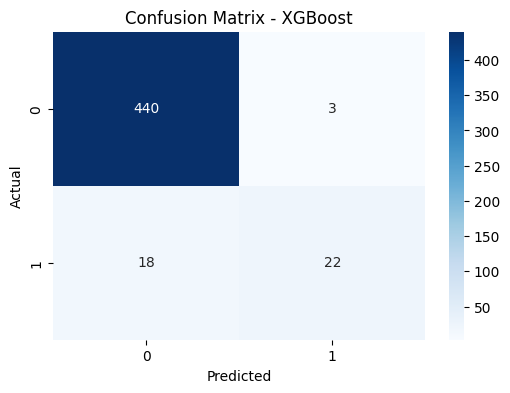

Classification Report:
              precision    recall  f1-score   support

           0     0.9607    0.9932    0.9767       443
           1     0.8800    0.5500    0.6769        40

    accuracy                         0.9565       483
   macro avg     0.9203    0.7716    0.8268       483
weighted avg     0.9540    0.9565    0.9519       483



In [ ]:
import os
import cv2
import numpy as np
import xgboost as xgb
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

ROOT = "Oral Cancer Prediction"
DATA_PATH = os.path.join(ROOT, "assets", "dataset")
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

model_name = "XGboost"
model_version = 2
model_path = os.path.join(ROOT, f"models/{model_name}_model_v{model_version}.json")
# Load the model
model_xgboost_2 = xgb.XGBClassifier()
model_xgboost_2.load_model(model_path)

# classes = {'cancer': 0, 'normal': 1}
classes = {"cancer": 1, "normal": 0}
CLASS_NAMES = ["cancer", "normal"].reverse()


# Load images and labels
def load_images_and_labels(base_path, img_size=IMG_SIZE):
    images, labels = [], []
    for label_name in classes.keys():
        class_dir = os.path.join(base_path, label_name)
        label = classes[label_name]  # 0 if label_name == 'normal' else 1
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)


# Step 1: Load images
X_images, y = load_images_and_labels(DATA_PATH)

# Step 2: Extract features using EfficientNetB0
base_model = EfficientNetB0(include_top=False, weights="imagenet", pooling="avg")
X_images = preprocess_input(X_images.astype("float32"))
features = base_model.predict(X_images, batch_size=BATCH_SIZE)

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    features, y, test_size=0.2, stratify=y, random_state=42
)

print(f"{model_name} model version: {model_version}")
# Step 5: Evaluation
y_pred = model_xgboost_2.predict(X_test)
print("\n\nAcc:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, model_xgboost_2.predict_proba(X_test)[:, 1]))

print(classes)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=CLASS_NAMES, digits=4))